# Lista 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *
plt.style.use('StyleBold.mplstyle')


Duplicate key in file 'StyleBold.mplstyle', line 64 ('font.family : DejaVu Serif')
Duplicate key in file 'StyleBold.mplstyle', line 65 ('mathtext.fontset : dejavusans')
Duplicate key in file 'StyleBold.mplstyle', line 66 ('axes.formatter.use_mathtext : True')



**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade  
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de  
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico clássico:  

$$P(x) \propto e^{-\beta E(x)}, \quad \text{com} \quad E(x) = \frac{1}{2}kx^2 .$$


onde $\beta = \frac{1}{k_B T}$, $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma^2 = \frac{1}{\beta k}$.

**(a)** Gere valores aleatórios de \(x\) a partir de uma distribuição uniforme e aceite-os com probabilidade proporcional a \(P(x)\) (método de rejeição). Assim, obtém-se uma amostra de valores de \(x\) que devem refletir a distribuição de Boltzmann. 

In [2]:
# Constantes utilizadas

k = 2 * np.pi           
beta = 1                
n = 100000    # Número de amostras


sigma = np.sqrt(1 / (k * beta))  # Desvio padrão
P_max = np.sqrt((beta * k) / (2 * np.pi))  


xmax = 3 * sigma        
xmin = -3 * sigma     



In [3]:
x_nao_rejeitados = []
for _ in range(n):
    x =  np.random.uniform(xmax, xmin)
    P = np.exp(-beta*E(x,k))
    gama = np.random.uniform(0, P_max)
    
    if gama < P:
        x_nao_rejeitados.append(x)




In [4]:
x_nao_rejeitados[:10]

[0.20638541992106063,
 -0.26050711505493385,
 -0.2692513838676134,
 0.18791222891146964,
 0.04877193919015488,
 0.22297429894759524,
 -0.35662189186356574,
 -0.0285567886818181,
 0.024775110980872483,
 -0.2020423136075702]

**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica.  



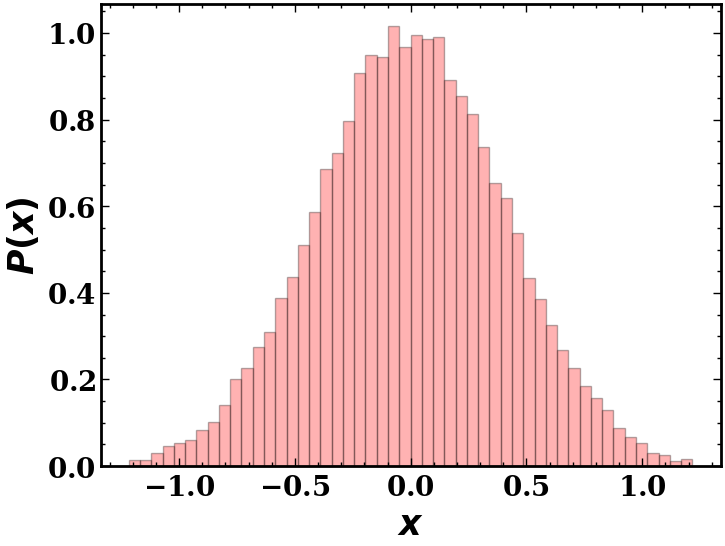

In [5]:
x_freq, bin_edges = histograma(x_nao_rejeitados, num_bins = 50, normalizar= True)
plt.bar(bin_edges, x_freq, width=bin_edges[1] - bin_edges[0], edgecolor='black', color = 'red', alpha = 0.3)
plt.ylabel(r'$P(x)$')
plt.xlabel(r'$x$')
plt.show()



**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:  
$$ P_{\text{teórica}}(x) = \sqrt{\frac{\beta k}{2\pi}} \exp\left(-\frac{\beta k x^2}{2}\right).$$

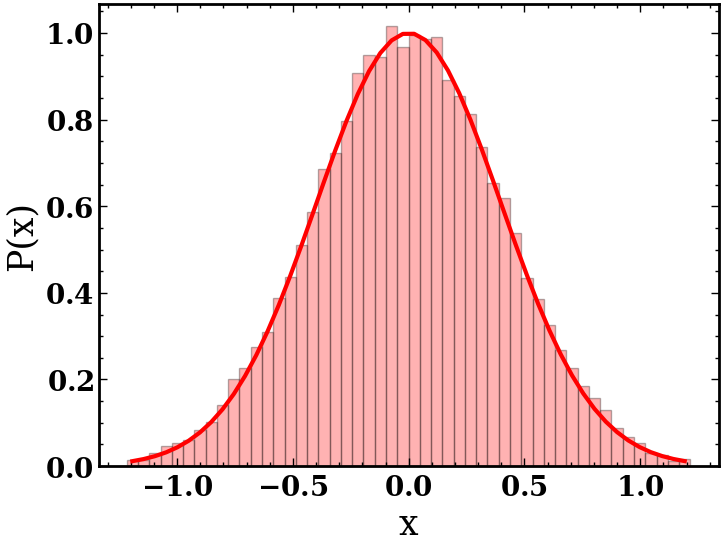

In [6]:
x_freq, bin_edges = histograma(x_nao_rejeitados, num_bins = 50, normalizar= True)
P_teorico= np.sqrt( (beta*k)/(2*np.pi))*np.exp(-0.5*beta*k*bin_edges**2)


plt.bar(bin_edges, x_freq, width=bin_edges[1] - bin_edges[0], edgecolor='black', color = 'red', alpha = 0.3 )
plt.plot(bin_edges, P_teorico, 'r-', )
plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:  
$$ \mathbb{E}[x] = 0, \quad \text{Var}(x) = \frac{1}{\beta k}. $$  

In [7]:
print(r'Valor da média teórica: ', 0)
print(r'Valor da média encontrado: ', media(np.array(x_nao_rejeitados)))
print('-'*50)
print(r'Valor da variancia Teórica: ', np.sqrt(1/(beta*k)))
print(r'Valor da variancia encontrado: ', np.std(np.array(x_nao_rejeitados)))


Valor da média teórica:  0
Valor da média encontrado:  0.00029808068465394025
--------------------------------------------------
Valor da variancia Teórica:  0.3989422804014327
Valor da variancia encontrado:  0.3936278506840594


**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras são consistentes com a distribuição teórica.

In [8]:
def ks_test(data, P_teorico):
    return max(abs(data - P_teorico))

def qui_test(data, P_teorico):
    return sum( ((data - P_teorico)**2)/P_teorico)

ks_test(x_freq, P_teorico)
print('ks_test: ', ks_test(x_freq, P_teorico))

qui_test(x_freq, P_teorico)
print('qui_test: ', qui_test(x_freq, P_teorico))




ks_test:  0.04767697522270986
qui_test:  0.06044524473961501




**(f)** Crie um Q-Q plot para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica. 

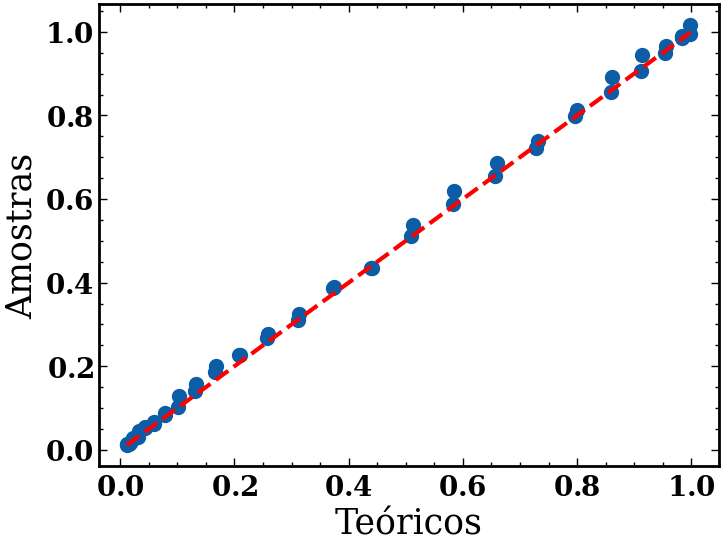

In [9]:
plt.scatter(sorted(P_teorico), sorted(x_freq))
plt.plot(sorted(P_teorico), sorted(P_teorico), color='red', linestyle='--')  # Linha de referência
plt.xlabel('Teóricos')
plt.ylabel('Amostras')
plt.show()

**Problema 2**:  

Sistemas biestáveis, como reações químicas em equilíbrio ou certos tipos de circuitos biológicos, frequentemente apresentam potenciais com múltiplos mínimos. Um exemplo clássico é o potencial:  

$$
V(x) = x^4 - 4x^2,
\tag{1}
$$ 

que possui dois mínimos estáveis e uma barreira entre eles. A dinâmica de uma partícula sujeita a este potencial, na presença de ruído térmico, pode ser descrita pela equação de Langevin, tipicamente escrita na forma unidimensional como:  

$$
\frac{dx}{dt} = -\frac{1}{\gamma} \frac{dV}{dx} + \eta(t),
$$  

onde $\gamma$ é um coeficiente de amortecimento e $\eta(t)$ é um ruído Gaussiano com média zero e correlação:  

$$
\langle \eta(t) \eta(t') \rangle = 2D \delta(t - t').
$$




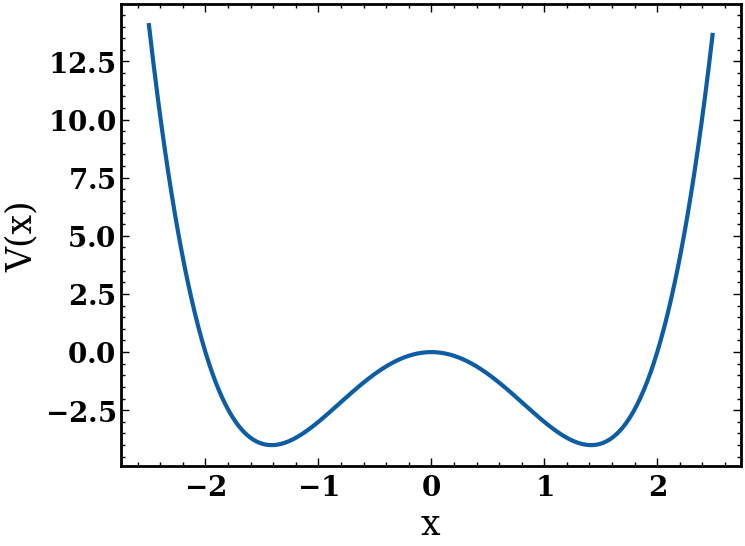

In [10]:
plt.plot(np.arange(-2.5,2.5,0.01), [V(x) for x in np.arange(-2.5,2.5,0.01)], '-')
plt.ylabel('V(x)')
plt.xlabel('x')
plt.show()

**(a)** Mostre que no equilíbrio, a distribuição de probabilidade estacionária da posição da partícula é a distribuição de Boltzmann:  

$$
P_{\text{eq}}(x) \propto e^{-\beta V(x)},
$$

com $\beta = 1 / (k_B T)$.  


**(b)** Ao invés de resolver a equação de Langevin diretamente, utilize o algoritmo de Metropolis para simular o comportamento estatístico da partícula neste potencial. Escolha uma posição inicial aleatória $x_0$. A cada passo, proponha uma nova posição:  

$$
x_{\text{nova}} = x + \Delta x,
$$

onde $\Delta x$ é um passo aleatório, por exemplo, gerado a partir de uma distribuição uniforme ou normal.  

Calcule a variação do potencial:  

$$
\Delta V = V(x_{\text{nova}}) - V(x),
$$

onde $V(x)$ é dado pela Eq. (1). A nova posição $x_{\text{nova}}$ é aceita com probabilidade:  

$$
P = \min(1, e^{-\beta \Delta V}).
$$ 

Caso não seja aceita, a posição permanece em $x$. Plote a posição \(x\) como função do tempo $t$.  



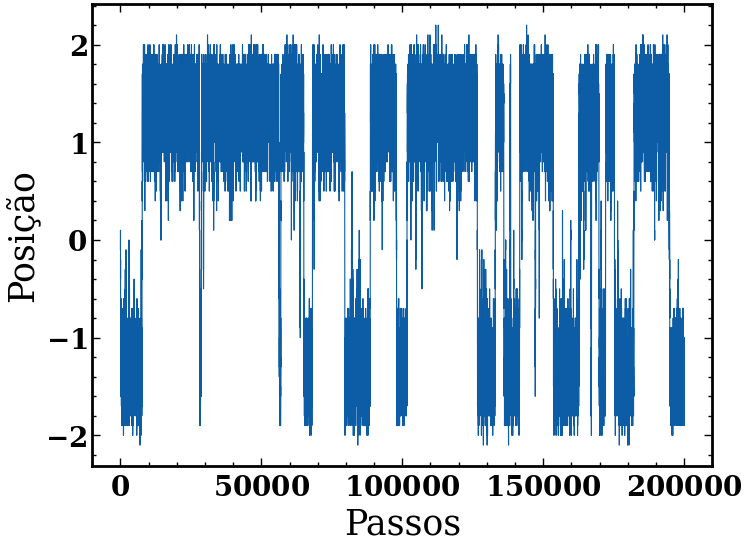

In [11]:
#posicao_inicial = np.random.uniform(-2.5,2.5)
posicao_inicial = 0

tamanho_passo = 0.1


n = 200000
beta = 1
posicoes_aceitas = []

for _ in range(n):
    passo = np.random.choice([-tamanho_passo, tamanho_passo])
    posicao_nova = posicao_inicial + passo

    delta_V = V(posicao_nova) - V(posicao_inicial)
    p_min = np.min([1, np.exp(-beta*delta_V)])
    
    r = np.random.uniform(0,1)
    if r < p_min:
        posicao_inicial = posicao_nova
        posicoes_aceitas.append(posicao_nova)
    else:   
        posicoes_aceitas.append(posicao_inicial)

plt.plot(np.arange(n)[:], posicoes_aceitas[:], '-', linewidth=0.8)
plt.ylabel('Posição')
plt.xlabel('Passos')
plt.show()   


**(c)** Compare as distribuições estacionárias obtidas pela solução do estado estacionário e o histograma resultante das simulações do algoritmo de Metropolis e verifique que a distribuição de posições obtida pelo Monte Carlo coincide com a distribuição de Boltzmann resultante da dinâmica de Langevin.  



In [27]:
def P_eq(x, beta = 1):
    return np.exp(-beta*V(x))


20000


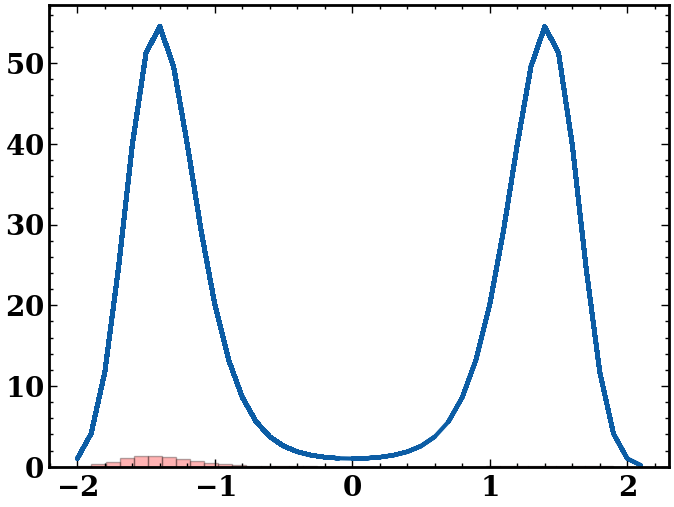

In [34]:
posicoes_aceitas_beta = []  # Lista para armazenar as posições aceitas para o beta atual
n = 20000
beta = 1
for _ in range(n):
    
    passo = np.random.choice([-tamanho_passo, tamanho_passo])
    posicao_nova = posicao_inicial + passo

    
    delta_V = V(posicao_nova) - V(posicao_inicial)
    p_min = np.min([1, np.exp(- beta * delta_V)])

    
    r = np.random.uniform(0, 1)
    if r < p_min:
        posicao_inicial = posicao_nova
    posicoes_aceitas_beta.append(posicao_inicial)
    
print(len(posicoes_aceitas_beta))

plt.hist(posicoes_aceitas_beta, bins = 40, density= True,color='red', edgecolor='black', alpha=0.3)
plt.plot(posicoes_aceitas_beta, [P_eq(x, beta = beta) for x in posicoes_aceitas_beta], '-')
plt.show()


**(d)** Realize longas simulações de Monte Carlo e calcule a probabilidade de encontrarmos a partícula na vizinhança dos mínimos do potencial $V(x)$ como função da temperatura $\beta$.  


In [14]:
#posicao_inicial = np.random.uniform(-2.5, 2.5)
posicao_inicial = 0
tamanho_passo = 0.1
n = 200000

# Lista para armazenar as posições aceitas para cada beta
posicoes_aceitas_betas = []

betas = [0.9, 0.7, 0.5, 0.3, 0.1, 0.01]

for beta in betas:
    posicoes_aceitas_beta = []  # Lista para armazenar as posições aceitas para o beta atual
    for _ in range(n):
        
        passo = np.random.choice([-tamanho_passo, tamanho_passo])
        posicao_nova = posicao_inicial + passo

        
        delta_V = V(posicao_nova) - V(posicao_inicial)
        p_min = np.min([1, np.exp(-beta * delta_V)])

        
        r = np.random.uniform(0, 1)
        if r < p_min:
            posicao_inicial = posicao_nova
        posicoes_aceitas_beta.append(posicao_inicial)

    
    posicoes_aceitas_betas.append(posicoes_aceitas_beta)

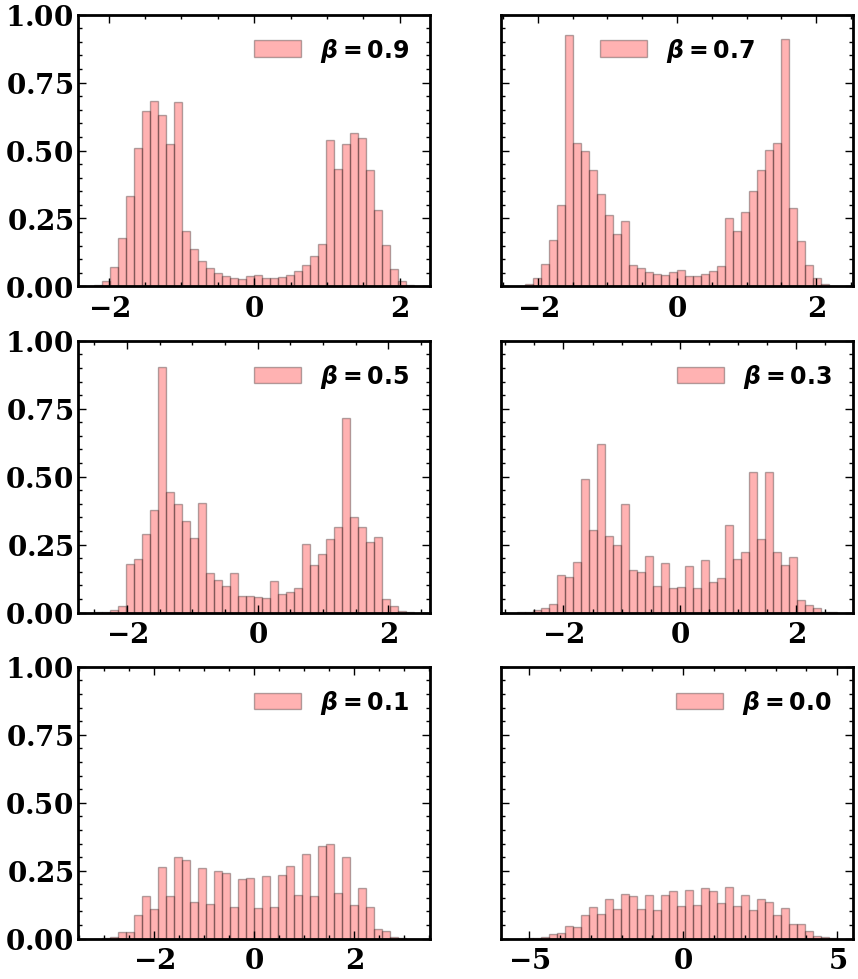

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharey=True)
ylim = (0, 1)


for ax, beta in zip(axes.flat, betas):
    ax.hist(posicoes_aceitas_betas[betas.index(beta)], bins= 40, density= True,color='red', edgecolor='black', alpha=0.3, label= fr'$\beta = {beta:.1f}$' )
    ax.set_ylim(ylim)
    ax.legend()

**Problema 3**: A constante de Stefan-Boltzmann, $ \sigma $, relaciona a energia total emitida por um corpo negro com sua temperatura. Ela é dada por:  
$$
\sigma = \frac{\pi^2 k_B^4}{60 \hbar^3 c^2} \cdot \zeta(4),
$$
onde $ \zeta(s) $ é a função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma integral:  
$$
\zeta(s) = \frac{1}{\Gamma(s)} \int_0^\infty \frac{x^{s-1} e^{-x}}{1 - e^{-x}} dx,
$$
onde $ \Gamma(s) = (s-1)! $ é a função Gamma.  

Utilizando **importance sampling**, gere amostras aleatórias de $ x $ de uma distribuição exponencial, $ \omega(x) = e^{-x} $ para $ x \geq 0 $, que corresponde ao termo $ e^{-x} $ no integrando.  

Reescreva a integral como:  
$$
\zeta(s) = \frac{1}{\Gamma(s)} E\left[\frac{x^{s-1}}{1 - e^{-x}}\right].
$$

Compare seu resultado de Monte Carlo com o valor exato:  
$$
\zeta(4) = \frac{\pi^4}{90}.
$$ 


In [16]:
soma_integral = 0

num_amostras = 40000

expoente = 4

soma_integral_total = []

for _ in range(num_amostras):
    random_uniform = np.random.uniform(0, 1)
    amostra_exponencial = -np.log(1 - random_uniform)
    soma_integral += (amostra_exponencial**(expoente - 1)) / (1 - np.exp(-amostra_exponencial))
    soma_integral_total.append(soma_integral)


z_estimado = soma_integral / num_amostras
print('Estimativa de ζ(4):', z_estimado / 6)

zeta_exato = (np.pi**4) / 90
print('Valor exato de ζ(4):', zeta_exato)


Estimativa de ζ(4): 1.0580789189986122
Valor exato de ζ(4): 1.082323233711138


# Problema 4

Considere a integral de uma funcão $ f(x) $ em um espaço de $ d $ dimensões. A integral pode ser expressa como:

$$
I = \int_{[0,1]^d} f(x) \, dx.
$$








**(a)** Utilize o método de Monte Carlo para estimar a integral acima. Gere $ N $ vetores $ x $ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $ d = 1 $ e 
$ f(x) = e^{-|x|^2} $.  

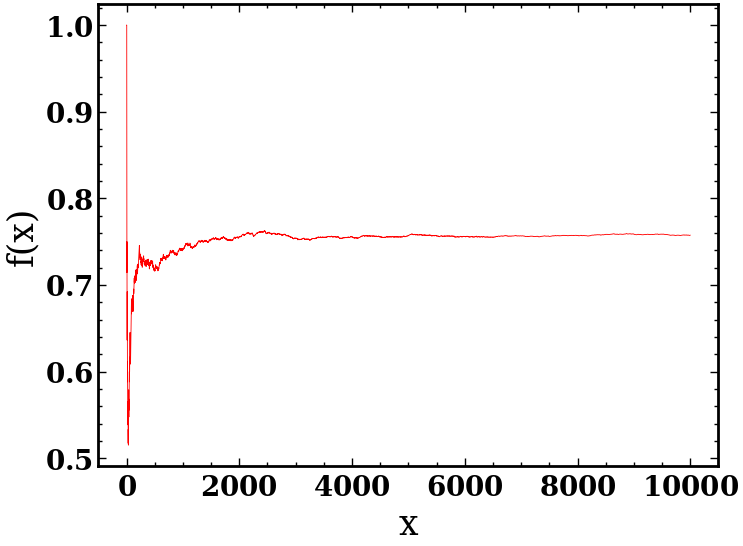

In [17]:
n_amostras = 10000
aceitos = 0
proporcao_aceitos_normalizada = []

for i in range(1, n_amostras + 1):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)

    if y < np.exp(-x**2):
        aceitos += 1
    
    proporcao_aceitos_normalizada.append(aceitos / i)

plt.plot(np.arange(n_amostras), proporcao_aceitos_normalizada, 'r-', linewidth=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**(b)** Para diferentes valores de $ d $ ($ d = 2,6,10 $), estude como o número de amostras $ N $ necessário para alcançar uma precisão desejada varia com a dimensionalidade.  

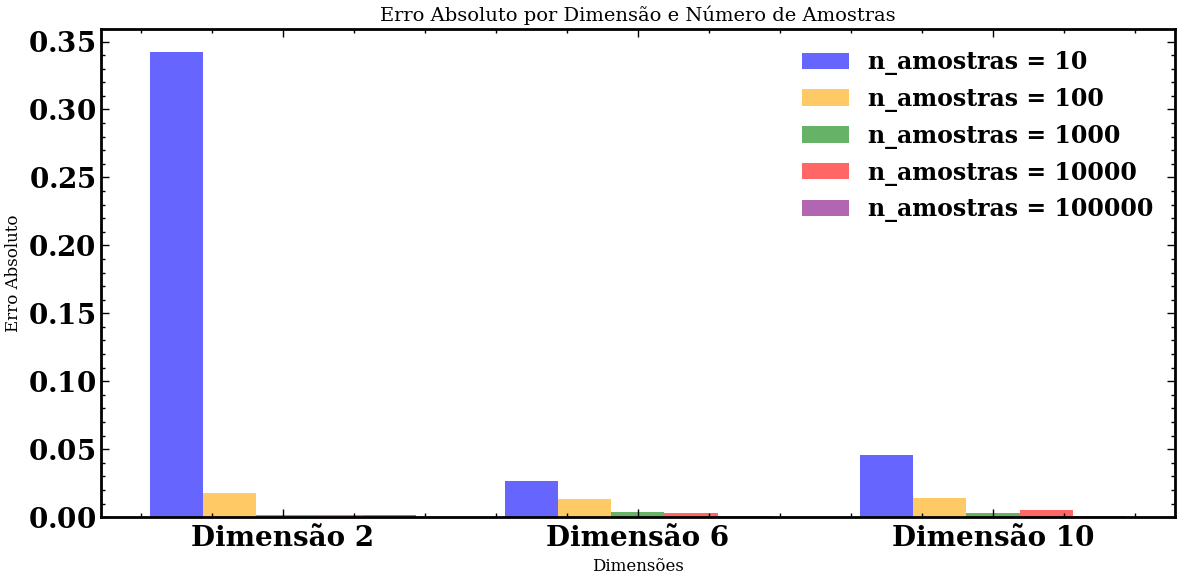

In [18]:
n_amostras_list = [10, 100, 1000, 10000, 100000]
dimensoes = [2, 6, 10]
valor_analitico = 0.746824

# Armazenar os erros absolutos
erros_absolutos = {}

for n_amostras in n_amostras_list:
    resultados_integral = []

    for dim in dimensoes:
        aceitos = 0
        proporcao_aceitos_normalizada = []
        for i in range(n_amostras):
            ponto = np.random.uniform(0, 1, size=dim)
            norma = np.linalg.norm(ponto)
            y = np.random.uniform(0, 1)

            if y < np.exp(-norma**2):
                aceitos += 1

            proporcao_aceitos_normalizada.append(aceitos / (i + 1))

        resultados_integral.append(proporcao_aceitos_normalizada)

    # Calculando erro absoluto final para cada dimensão
    erros_absolutos[n_amostras] = []
    for idx, dim in enumerate(dimensoes):
        erro_absoluto = np.abs(np.array(resultados_integral[idx]) - (valor_analitico ** dim))
        erros_absolutos[n_amostras].append(erro_absoluto[-1])  # Último valor do erro absoluto

# Preparar dados para o gráfico
x = np.arange(len(dimensoes))  # Posições para as dimensões
width = 0.15  # Largura das barras
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Cores para cada grupo

# Criar o gráfico
plt.figure(figsize=(12, 6))

for i, n_amostras in enumerate(n_amostras_list):
    plt.bar(
        x + i * width,
        erros_absolutos[n_amostras],
        width=width,
        label=f'n_amostras = {n_amostras}',alpha = 0.6,
        color=colors[i % len(colors)]
    )

# Configurações do gráfico
plt.xticks(x + width * (len(n_amostras_list) - 1) / 2, [f'Dimensão {dim}' for dim in dimensoes])
plt.xlabel('Dimensões', fontsize=12)
plt.ylabel('Erro Absoluto', fontsize=12)
plt.title('Erro Absoluto por Dimensão e Número de Amostras', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Valor médio dimensão 1: 0.7468389875228344
Valor médio dimensão 2: 0.5570710756804909
Valor médio dimensão 6: 0.17259639065538845
Valor médio dimensão 10: 0.05426979461518778


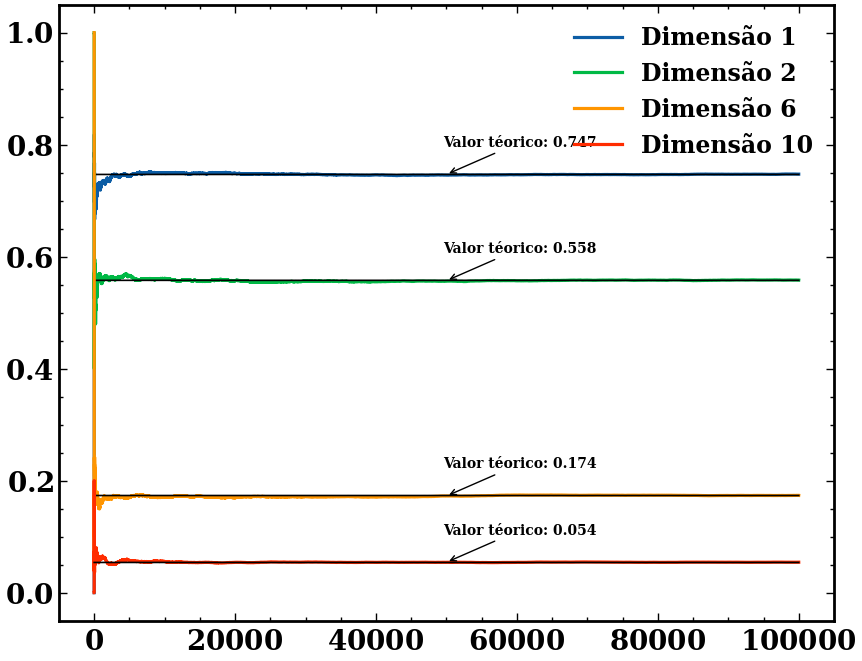

In [19]:
n_amostras = 100000
dimensoes = [1, 2, 6, 10]

resultados_integral = []

for dim in dimensoes:
    aceitos = 0
    proporcao_aceitos_normalizada = []
    for i in range(n_amostras):
        ponto = np.random.uniform(0, 1, size=dim)
        norma = np.linalg.norm(ponto)
        y = np.random.uniform(0, 1)

        if y < np.exp(-norma**2):
            aceitos += 1

        proporcao_aceitos_normalizada.append(aceitos / (i + 1))

    resultados_integral.append(proporcao_aceitos_normalizada)

plt.figure(figsize = (10,8))
for i in range(len(dimensoes)):
    plt.plot(np.arange(n_amostras), resultados_integral[i], linewidth=2.3, label=f'Dimensão {dimensoes[i]}')
    plt.plot(np.arange(n_amostras), np.ones(n_amostras)*(0.746824)**(dimensoes[i]), 'k-', linewidth=1.2)
    valor_medio = np.mean(resultados_integral[i][10000:])
    print(f'Valor médio dimensão {dimensoes[i]}:', valor_medio)
    valor_analitico = 0.746824
    meio_x = n_amostras // 2  # Posição no meio do eixo x
    plt.annotate(f'Valor téorico: {valor_analitico**(dimensoes[i]):.3f}', 
                 xy=(meio_x, valor_medio), 
                 xytext=(meio_x - 500, valor_medio + 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.legend()
plt.show()




**(c)** Calcule o erro padrão da média para cada caso e analise a taxa de convergência.

In [20]:
def erro_padrao (ponto, media, N):
    return np.sqrt(sum ( (ponto - media)**2)/N)

In [21]:
n_amostras = 100000
dimensoes = [1, 2, 6, 10]

resultados_integral = []

for dim in dimensoes:
    aceitos = 0
    proporcao_aceitos_normalizada = []
    for i in range(n_amostras):
        ponto = np.random.uniform(0, 1, size=dim)
        norma = np.linalg.norm(ponto)
        y = np.random.uniform(0, 1)

        if y < np.exp(-norma**2):
            aceitos += 1

        proporcao_aceitos_normalizada.append(aceitos / (i + 1))

    resultados_integral.append(proporcao_aceitos_normalizada)





## Problema 5  
Em física de partículas, distribuições angulares podem descrever a probabilidade de observação de partículas em diferentes direções após colisões de alta energia. Como exemplo, considere a reação de aniquilação entre um elétron e um pósitron para formar um par de múons ($ \mu^+ \mu^- $). A probabilidade de observar um múon em um determinado ângulo $ \theta $ (medido a partir da direção do elétron incidente) é proporcional a:  
$$
P(\theta) \propto 1 + \cos^2(\theta), \quad 0 \leq \theta \leq \pi.
$$

Sob essas condições, o problema propõe a geração de amostras do ângulo $ \theta $ cuja distribuição segue a função de probabilidade acima usando métodos de Monte Carlo:  


**(a)** 
Normalize a distribuição de probabilidades $ P(\theta) $, determinando o fator de normalização.  




**(b)** Implemente um método de amostragem para gerar valores de $ \theta $ que sigam $ P(\cos\theta) $ utilizando métodos de Monte Carlo por rejeição. Ou seja,  Sorteie ângulos $ \theta $ uniformemente distribuídos em $ [0, \pi] $ e gere números aleatórios uniformes para decidir se cada $ \theta $ proposto é aceito com base em sua probabilidade relativa $ 1 + \cos^2(\theta) $.  


In [22]:
# x -> cos theta
def P(x):
    return 1 + x**2

In [23]:
n_amostras = 30000
hits_aceitos = 0
pro_aceitos_normalizada = []
X_aceitos = []

for i in range(1, n_amostras):
    X = np.random.uniform(-1, 1)
    y = np.random.uniform(-2, 2)

    if y < (1 + X**2)*(1/np.sqrt(1-X**2)):
        hits_aceitos += 1
        X_aceitos.append(X)

    
    pro_aceitos_normalizada.append(aceitos / n_amostras)

print((hits_aceitos/n_amostras)*((3*np.pi)/2))
print((hits_aceitos/n_amostras))

4.147844780534604
0.8802



**(c)** Crie um histograma dos valores de $ \theta $ obtidos e compare com a distribuição teórica $ P(\theta) $. Compare seu resultado com a Figura 13.2 de [1].  


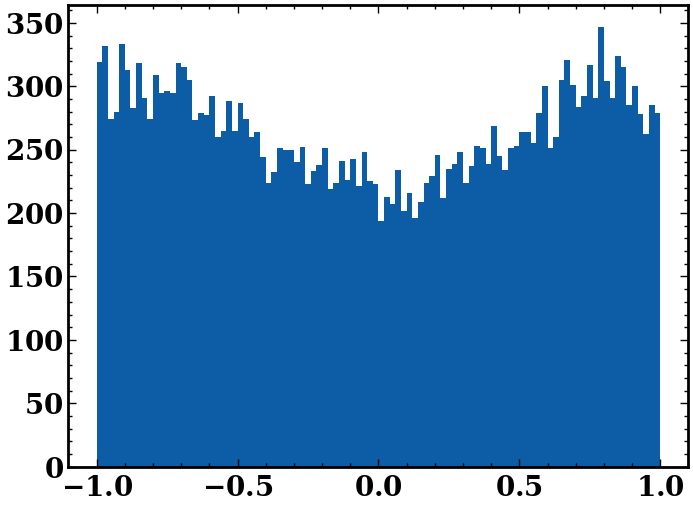

In [24]:
plt.hist(X_aceitos, bins = 100)
plt.show()


**(d)** Calcule a média e a variância das amostras obtidas e compare com os valores teóricos para a distribuição normalizada.  

 

**(e)** Realize testes estatísticos, como Kolmogorov-Smirnov (K-S) e qui-quadrado, para avaliar quantitativamente se as amostras obtidas são consistentes com a distribuição teórica. 